In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv(r"loan.csv")

C:\Users\Pritam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data_dict_all=pd.read_excel('LCDataDictionary.xlsx',sheet_name='LoanStats')

In [5]:
data_dict=data_dict_all.iloc[:,0:2]
data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [6]:
data_dtypes=pd.DataFrame(data.dtypes,columns=['dtype'])
data_dtypes.reset_index(inplace=True)
data_dtypes.columns=['LoanStatNew', 'dtype']
data_dtypes['first value'] = data.loc[0].values

In [7]:
data_col=data_dtypes.merge(data_dict, on='LoanStatNew',how='left')

In [8]:
d={'LoanStatNew':[],'Nulls':[]}
for i in data.columns:
    d['LoanStatNew'].append(i)
    d['Nulls'].append(len(data[data[i].isnull()][i]))
data_col=data_col.merge(pd.DataFrame(d),on='LoanStatNew')
nulls=pd.DataFrame(d)

In [9]:
default=['Charged Off','Late (31-120 days)','Late (16-30 days)','Does not meet the credit policy. Status:Charged Off',
         'In Grace Period','Default']
data['loan_status']=data['loan_status'].apply(lambda x: 'Default' if x in default else x)

In [10]:
paid=['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
data['loan_status']=data['loan_status'].apply(lambda x: 'Fully Paid' if x in paid else x)

In [11]:
data_col[13:26]

,LoanStatNew,dtype,first value,Description,Nulls
13,annual_inc,float64,24000.0,The self-reported annual income provided by th...,11
14,verification_status,object,Verified,"Indicates if income was verified by LC, not ve...",7
15,issue_d,object,11-Dec,The month which the loan was funded,7
16,loan_status,object,Fully Paid,Current status of the loan,7
17,pymnt_plan,object,n,Indicates if a payment plan has been put in pl...,7
18,url,object,https://lendingclub.com/browse/loanDetail.acti...,URL for the LC page with listing data.,7
19,desc,object,Borrower added on 12/22/11 > I need to upgra...,Loan description provided by the borrower,13300
20,purpose,object,credit_card,A category provided by the borrower for the lo...,7
21,title,object,Computer,The loan title provided by the borrower,20
22,zip_code,object,860xx,The first 3 numbers of the zip code provided b...,7


In [12]:
data.drop(['id','member_id','funded_amnt','funded_amnt_inv','installment','sub_grade','emp_title','url','desc','title',
           'zip_code','mths_since_last_delinq','mths_since_last_record','out_prncp','out_prncp_inv','total_pymnt',
           'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
          'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
           'collections_12_mths_ex_med','policy_code','mths_since_last_major_derog','earliest_cr_line', 'inq_last_6mths',
           'pub_rec', 'revol_bal', 'acc_now_delinq','revol_util','initial_list_status','pub_rec_bankruptcies',
           'chargeoff_within_12_mths','tax_liens','application_type','issue_d','addr_state'],
          axis=1,inplace=True)

In [13]:
data = data.dropna(thresh=(len(data)/2),axis=1) 

In [14]:
data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,open_acc,total_acc,delinq_amnt
0,5000.0,36 months,10.65%,B,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,27.65,0.0,3.0,9.0,0.0
1,2500.0,60 months,15.27%,C,< 1 year,RENT,30000.0,Source Verified,Default,n,car,1.00,0.0,3.0,4.0,0.0
2,2400.0,36 months,15.96%,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,8.72,0.0,2.0,10.0,0.0
3,10000.0,36 months,13.49%,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,20.00,0.0,10.0,37.0,0.0
4,3000.0,60 months,12.69%,B,1 year,RENT,80000.0,Source Verified,Current,n,other,17.94,0.0,15.0,38.0,0.0


C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

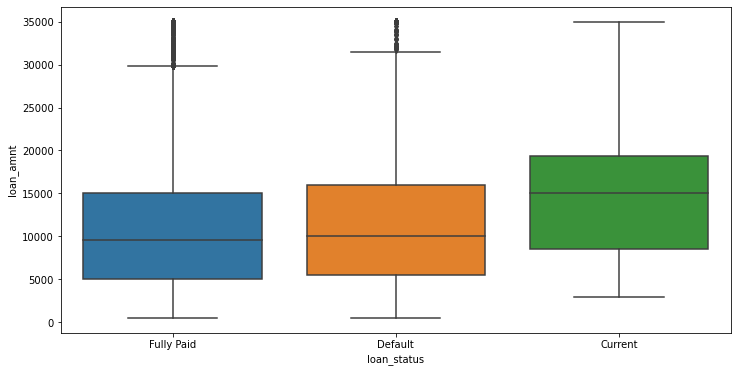

In [24]:
import seaborn as sns
plt.figure(figsize=(12,6))
#plt.xticks(rotation=90)
sns.boxplot(data['loan_status'],data['loan_amnt'])

In [16]:
def encode_emp_length(x):
    if type(x)==float: #Check for nan ,as only Nans are float while other values are str
        return 0 # nan will be replaced with zero
    if x=='10+ years':
        return 10
    if x=='< 1 year':
        return 0
    else:
        return int(x.split(' ')[0])
    
data['emp_length']=data['emp_length'].apply(encode_emp_length)

In [17]:
data['emp_length'].value_counts()

10    9369
0     6181
2     4743
3     4364
4     3649
1     3595
5     3458
6     2375
7     1875
8     1592
9     1341
Name: emp_length, dtype: int64

In [18]:
def encode_term(x):
    if x==' 36 months':
        return int(36)
    if x==' 60 months':
        return int(60)

data['term']=data['term'].apply(encode_term)

In [19]:
def encode_grade(x):
    if x=='A':
        return 1
    if x=='B':
        return 2
    if x=='C':
        return 3
    if x=='D':
        return 4
    if x=='E':
        return 5
    if x=='F':
        return 6
    if x=='G':
        return 7
    
data['grade']=data['grade'].apply(encode_grade)

In [20]:
data['home_ownership']=data['home_ownership'].apply(lambda x: 'RENT' if x in ['OTHER','NONE'] else x)

In [21]:
def encode_home(x):
    if x=='RENT':
        return 1
    if x=='MORTGAGE':
        return 2
    if x=='OWN':
        return 3
    
data['home_ownership']=data['home_ownership'].apply(encode_home)

In [22]:
def encode_int_rate(x):
    x=x.rstrip(x[-1])
    return float(x)

data['int_rate']=data['int_rate'].apply(encode_int_rate)

AttributeError: 'float' object has no attribute 'rstrip'